In [18]:
import os
import tensorflow as tf
import csv
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mping

# New image map folder paths
image_map_folder = 'image_map/'
train_pairs_csv = image_map_folder + 'train_image_pairs.csv'
test_pairs_csv = image_map_folder + 'test_image_pairs.csv'

# Function to get image pairs and labels from CSV
def get_image_pairs_and_labels(pairs_csv_path):
    image_pairs = []
    labels = []
    with open(pairs_csv_path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        next(csv_reader)  # Skip header
        for row in csv_reader:
            image_path1 = row[0]
            image_path2 = row[1]
            label = int(row[2])
            image_pairs.append((image_path1, image_path2))
            labels.append(label)
    return image_pairs, labels

# Get training and testing image pairs and labels
train_image_pairs, train_labels = get_image_pairs_and_labels(train_pairs_csv)
test_image_pairs, test_labels = get_image_pairs_and_labels(test_pairs_csv)

# Print some samples to verify
print(f"Training image pairs: {train_image_pairs[:5]}")
print(f"Training labels: {train_labels[:5]}")
print(f"Testing image pairs: {test_image_pairs[:5]}")
print(f"Testing labels: {test_labels[:5]}")

print(f"Training pairs: {len(train_image_pairs)}")
print(f"Testing pairs: {len(test_image_pairs)}")

Training image pairs: [('../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/250.png', '../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/130.png'), ('../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/228.png', '../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/219.png'), ('../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/278.png', '../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/229.png'), ('../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/201.png', '../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/172.png'), ('../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/64.png', '../../Calista/website-aesthetics-datasets-master/comparison-based-da

In [19]:

temp = list(zip(train_image_pairs, train_labels))
random.shuffle(temp)

train_image_pairs, train_labels = zip(*temp)

# print(f"train_labels: {train_labels}")

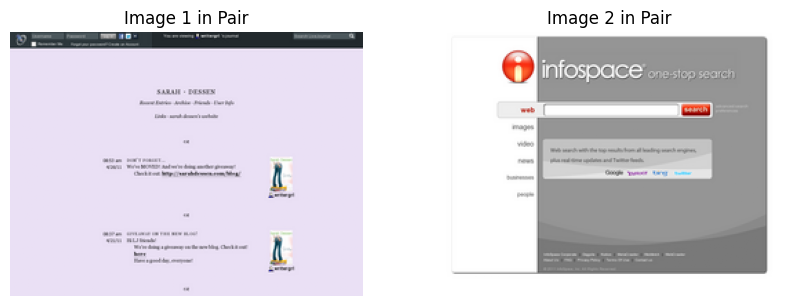

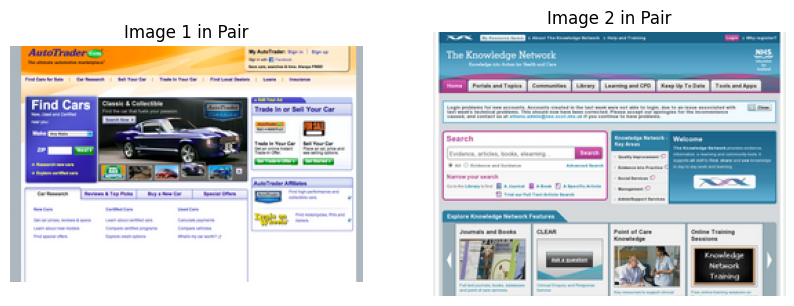

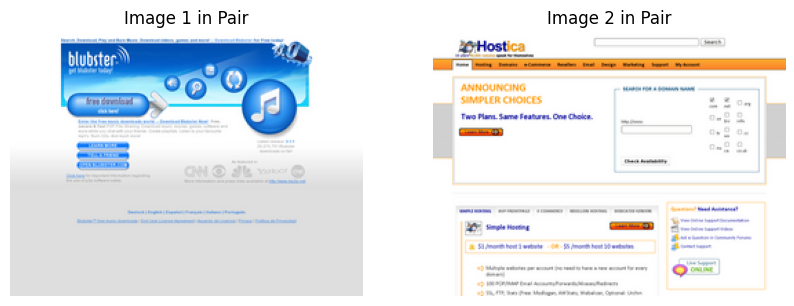

In [20]:
  # Display 3 random pairs of images side by side
for pair in train_image_pairs[:3]:
    img1 = mping.imread(pair[0])  # Read the first image in the pair
    img2 = mping.imread(pair[1])  # Read the second image in the pair

    # Create a figure with two subplots side by side
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the first image on the first subplot
    axs[0].imshow(img1)
    axs[0].set_title('Image 1 in Pair')
    axs[0].axis('off')  # Hide axes

    # Plot the second image on the second subplot
    axs[1].imshow(img2)
    axs[1].set_title('Image 2 in Pair')
    axs[1].axis('off')  # Hide axes

    # Display the plot
    plt.show()

In [21]:
width = 256
height = 192
channels = 3
def read_and_process_image_pairs(list_of_image_pairs):
    X = []

    for image1, image2 in list_of_image_pairs:
        img1 = cv2.imread(image1, cv2.IMREAD_COLOR)
        img2 = cv2.imread(image2, cv2.IMREAD_COLOR)

        #  Resize images if needed
        img1 = cv2.resize(img1, (width, height), interpolation=cv2.INTER_AREA)
        img2 = cv2.resize(img2, (width, height), interpolation=cv2.INTER_AREA)
                # Print the dimensions of each image
        print(f"Image1 ({image1}) shape: {img1.shape}")
        print(f"Image2 ({image2}) shape: {img2.shape}")
        # img1 = cv2.resize(img1, (width, height), interpolation=cv2.INTER_CUBIC)
        # img2 = cv2.resize(img2, (width, height), interpolation=cv2.INTER_CUBIC)
        # img1 = cv2.resize(img1, (width, height), interpolation=cv2.INTER_LINEAR)
        # img2 = cv2.resize(img2, (width, height), interpolation=cv2.INTER_LINEAR)
        # img1 = cv2.resize(img1, (width, height), interpolation=cv2.INTER_LANCZOS4)
        # img2 = cv2.resize(img2, (width, height), interpolation=cv2.INTER_LANCZOS4)


        #         # Maintain aspect ratio by padding
        # img1 = maintain_aspect_ratio_and_resize(img1, width, height)
        # img2 = maintain_aspect_ratio_and_resize(img2, width, height)

        X.append((img1, img2))

    return X

 # Process training image pairs
X_pairs_train = np.array(read_and_process_image_pairs(train_image_pairs))
y_pairs_train = np.array(train_labels)

# Process validation image pairs
X_pairs_val = np.array(read_and_process_image_pairs(test_image_pairs))
y_pairs_val = np.array(test_labels)

# print(f"training pairs shape:   ",X_pairs_train.shape )

Image1 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/203.png) shape: (192, 256, 3)
Image2 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/47.png) shape: (192, 256, 3)
Image1 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/153.png) shape: (192, 256, 3)
Image2 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/60.png) shape: (192, 256, 3)
Image1 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/276.png) shape: (192, 256, 3)
Image2 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/37.png) shape: (192, 256, 3)
Image1 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/205.png) shape: (192, 256, 3)
Image2 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/126.png) shape: (

Image1 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/251.png) shape: (192, 256, 3)
Image2 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/196.png) shape: (192, 256, 3)
Image1 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/322.png) shape: (192, 256, 3)
Image2 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/6.png) shape: (192, 256, 3)
Image1 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/222.png) shape: (192, 256, 3)
Image2 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/212.png) shape: (192, 256, 3)
Image1 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/127.png) shape: (192, 256, 3)
Image2 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/69.png) shape: (

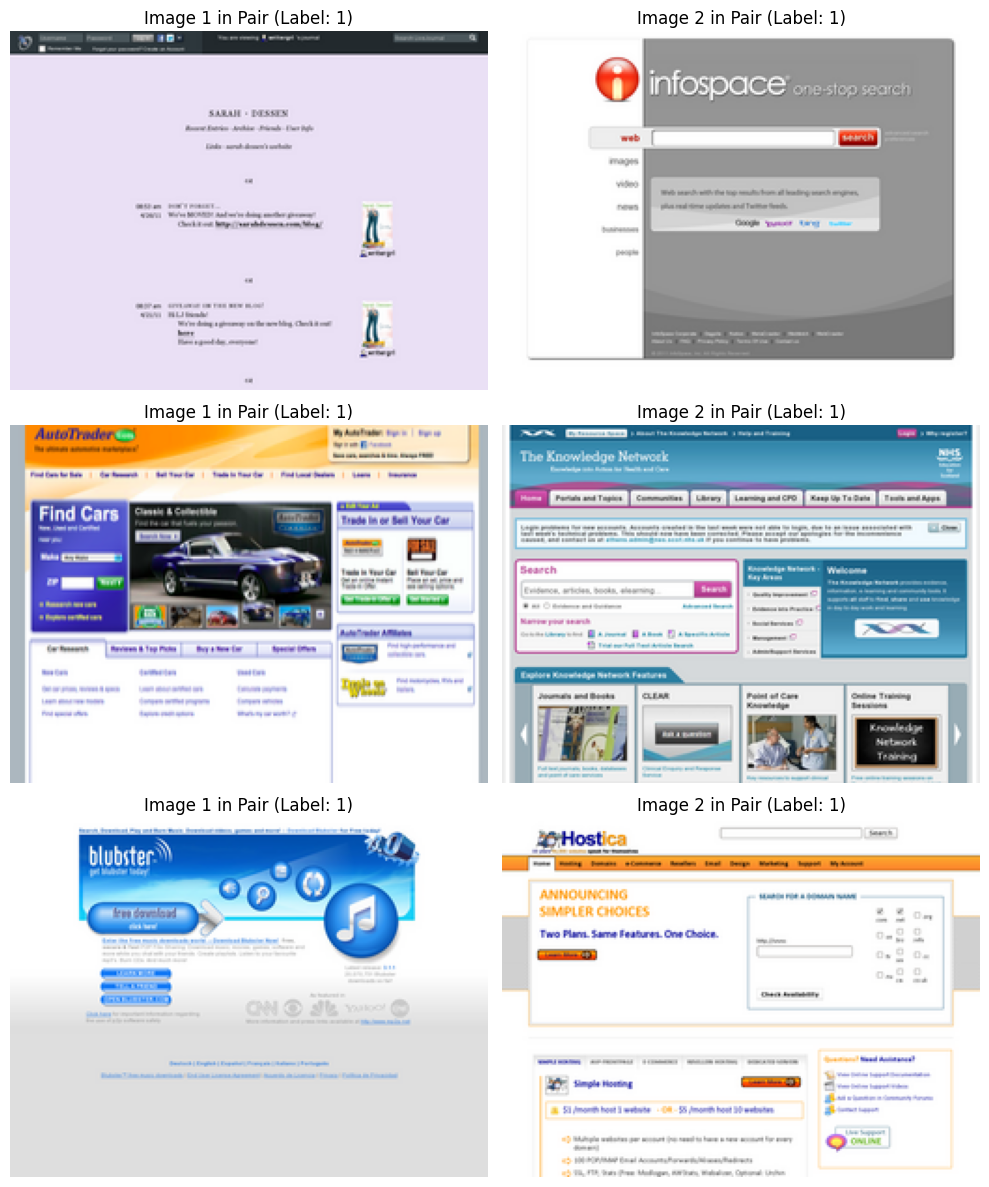

In [22]:
# Number of pairs to display
num_pairs_to_display = 3

# Create subplots
fig, axes = plt.subplots(num_pairs_to_display, 2, figsize=(10, 4 * num_pairs_to_display))

for i in range(num_pairs_to_display):
    img1, img2 = X_pairs_train[i]
    label = y_pairs_train[i]

    # Display the first image in the pair
    axes[i, 0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    axes[i, 0].set_title(f'Image 1 in Pair (Label: {label})')
    axes[i, 0].axis('off')

    # Display the second image in the pair
    axes[i, 1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    axes[i, 1].set_title(f'Image 2 in Pair (Label: {label})')
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()

In [23]:
ntrain = len(X_pairs_train)
nval = len(y_pairs_train)

In [24]:
import h5py

def traverse_datasets(hdf_file):

    def h5py_dataset_iterator(g, prefix=''):
        for key in g.keys():
            item = g[key]
            path = f'{prefix}/{key}'    
            if isinstance(item, h5py.Dataset): # test for dataset
                yield (path, item)
            elif isinstance(item, h5py.Group): # test for group (go down)
                yield from h5py_dataset_iterator(item, path)

    with h5py.File(hdf_file, 'r') as f:
        for path, _ in h5py_dataset_iterator(f):
            yield path

weights = {}
filename = '../../Calista/pretrainedModels/flickr_style.h5'

with h5py.File(filename, 'r') as f:
    for dset in traverse_datasets(filename):
        print('Path:', dset)
        # print('Shape:', f[dset].shape)
        # print('Data type:', f[dset].dtype)
        weights[dset] = f[dset][:]

conv1_bias = weights['/conv1/conv1/bias:0']
conv1_kernel = weights['/conv1/conv1/kernel:0']
conv2_bias = weights['/conv2/conv2/bias:0']
conv2_kernel = weights['/conv2/conv2/kernel:0']
conv3_bias = weights['/conv3/conv3/bias:0']
conv3_kernel = weights['/conv3/conv3/kernel:0']
conv4_bias = weights['/conv4/conv4/bias:0']
conv4_kernel = weights['/conv4/conv4/kernel:0']
conv5_bias = weights['/conv5/conv5/bias:0']
conv5_kernel = weights['/conv5/conv5/kernel:0']


Path: /conv1/conv1/bias:0
Path: /conv1/conv1/kernel:0
Path: /conv2/conv2/bias:0
Path: /conv2/conv2/kernel:0
Path: /conv3/conv3/bias:0
Path: /conv3/conv3/kernel:0
Path: /conv4/conv4/bias:0
Path: /conv4/conv4/kernel:0
Path: /conv5/conv5/bias:0
Path: /conv5/conv5/kernel:0
Path: /fc6/fc6/bias:0
Path: /fc6/fc6/kernel:0
Path: /fc7/fc7/bias:0
Path: /fc7/fc7/kernel:0
Path: /fc8_flickr/fc8_flickr/bias:0
Path: /fc8_flickr/fc8_flickr/kernel:0


In [25]:
from shared_feature_extractor import create_shared_feature_extractor
from rating_model import create_ratingModel
from comparison_model import create_comparisonModel
from tensorflow import keras
from keras import models
# import tensorflow as tf


# input_shape = (192, 256, 3)
shared_feature_extractor = create_shared_feature_extractor()
# rating_model = create_ratingModel(shared_feature_extractor)
input_a, input_b, comparison_model = create_comparisonModel(shared_feature_extractor)

In [26]:
shared_feature_extractor.get_layer('conv1').set_weights([conv1_kernel[:, :, :, :], conv1_bias[:]])
shared_feature_extractor.get_layer('conv2_1').set_weights([conv2_kernel[:, :, :, :128], conv2_bias[:128]])
shared_feature_extractor.get_layer('conv2_2').set_weights([conv2_kernel[:, :, :, 128:], conv2_bias[128:]])
shared_feature_extractor.get_layer('conv3').set_weights([conv3_kernel[:, :, :, :], conv3_bias[:]])
shared_feature_extractor.get_layer('conv4_1').set_weights([conv4_kernel[:, :, :, :192], conv4_bias[:192]])
shared_feature_extractor.get_layer('conv4_2').set_weights([conv4_kernel[:, :, :, 192:], conv4_bias[192:]])
shared_feature_extractor.get_layer('conv5_1').set_weights([conv5_kernel[:, :, :, :128], conv5_bias[:128]])
shared_feature_extractor.get_layer('conv5_2').set_weights([conv5_kernel[:, :, :, 128:], conv5_bias[128:]])

# rating_model.summary()
# comparison_model.summary()
comparison_model.summary()

Model: "comparison_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_a (InputLayer)        [(None, 192, 256, 3)]        0         []                            
                                                                                                  
 input_b (InputLayer)        [(None, 192, 256, 3)]        0         []                            
                                                                                                  
 shared_feature_extractor (  (None, 5, 7, 256)            2334080   ['input_a[0][0]',             
 Functional)                                                         'input_b[0][0]']             
                                                                                                  
 flatten_2 (Flatten)         (None, 8960)                 0         ['shared_featur

In [27]:
# Define the Bradley-Terry based loss for the comparison task
def bradley_terry_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    return tf.reduce_mean(tf.math.log(1 + tf.exp(-y_true * y_pred)))

    # Custom accuracy function for the comparison output 
def custom_binary_accuracy(y_true, y_pred):
    # Use 0.0 as the threshold for tanh output
    y_pred = tf.where(y_pred >= 0.0, 1.0, -1.0)  # Convert predictions to 1 or -1
    # y_pred = tf.math.sign(y_pred)  # Convert predictions to -1 or 1
    y_true = tf.cast(y_true, tf.float32)
    return tf.reduce_mean(tf.cast(tf.equal(y_true, y_pred), tf.float32))

In [28]:
from data_generator import comparison_data_generator
batch_size = 32
# Define the output signature
comparison_output_signature = (
    (
        tf.TensorSpec(shape=(None, 192, 256, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, 192, 256, 3), dtype=tf.float32)
    ),
    tf.TensorSpec(shape=(None,), dtype=tf.float32)
)

# Create TensorFlow Dataset objects
comparison_gen_train = tf.data.Dataset.from_generator(
    lambda: comparison_data_generator(X_pairs_train, y_pairs_train, batch_size),
    output_signature=comparison_output_signature
)

comparison_gen_val = tf.data.Dataset.from_generator(
    lambda: comparison_data_generator(X_pairs_val, y_pairs_val, batch_size),
    output_signature=comparison_output_signature
)

In [29]:

# decay = 1e-4

epochs = 50
# base_lr = 0.0001
base_lr = 1e-6
initial_learning_rate = base_lr
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

sgd = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.9, nesterov=True)


# rating_model.compile(loss=euclidean_distance_loss , optimizer=sgd, metrics=[rmse])
# comparison_model.compile(loss=bradley_terry_loss, optimizer=adam_optimizer, metrics=[rmse])

comparison_model.compile(loss=bradley_terry_loss, optimizer=adam_optimizer,
                    metrics={
    'comparison_output' : [custom_binary_accuracy]
     })


In [30]:
# Fit the model
history = comparison_model.fit(comparison_gen_train,
    steps_per_epoch = ntrain // batch_size,
    epochs = epochs,
    validation_data = comparison_gen_val,
    validation_steps = nval // batch_size)


Epoch 1/50


2024-07-10 21:48:33.545049: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape incomparison_model/shared_feature_extractor/dropout1/dropout_1/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-07-10 21:48:33.829036: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-07-10 21:48:36.449022: I external/local_xla/xla/service/service.cc:168] XLA service 0x7e6b53353460 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-07-10 21:48:36.449047: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 6GB, Compute Capability 6.1
2024-07-10 21:48:36.453761: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1720637316.525548  525939 device_com

60/60 [==============================] - 17s 159ms/step - loss: 5.2691 - custom_binary_accuracy: 0.4922 - val_loss: 5.2537 - val_custom_binary_accuracy: 0.5618
Epoch 2/50
60/60 [==============================] - 10s 131ms/step - loss: 5.2394 - custom_binary_accuracy: 0.5077 - val_loss: 5.2244 - val_custom_binary_accuracy: 0.5622
Epoch 3/50
60/60 [==============================] - 8s 131ms/step - loss: 5.2102 - custom_binary_accuracy: 0.5077 - val_loss: 5.1951 - val_custom_binary_accuracy: 0.5651
Epoch 4/50
60/60 [==============================] - 9s 144ms/step - loss: 5.1810 - custom_binary_accuracy: 0.5077 - val_loss: 5.1661 - val_custom_binary_accuracy: 0.5574
Epoch 5/50
60/60 [==============================] - 8s 131ms/step - loss: 5.1519 - custom_binary_accuracy: 0.5207 - val_loss: 5.1372 - val_custom_binary_accuracy: 0.5540
Epoch 6/50
60/60 [==============================] - 8s 131ms/step - loss: 5.1231 - custom_binary_accuracy: 0.4943 - val_loss: 5.1085 - val_custom_binary_accura

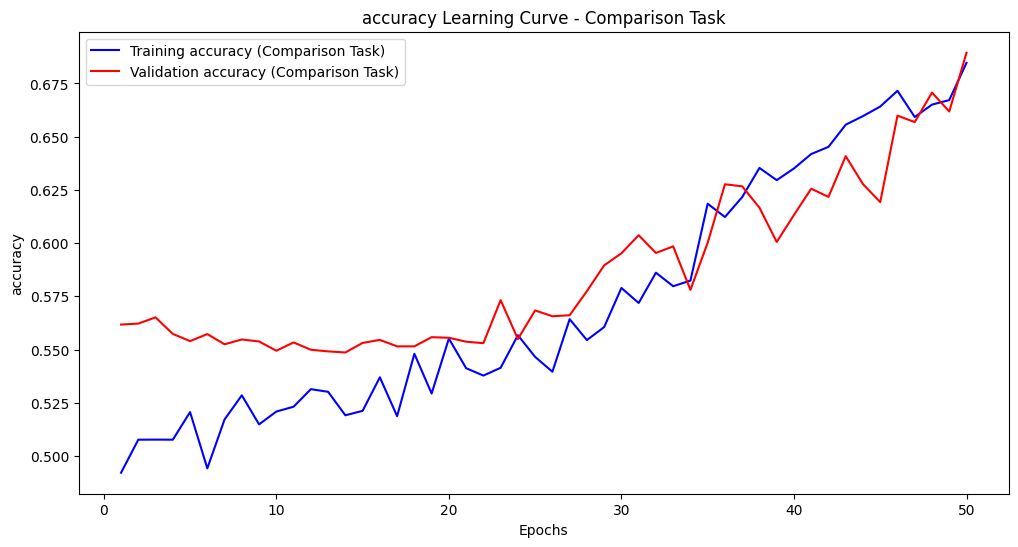

In [31]:
# Extract RMSE metrics from history
comparison_output_custom_binary_accuracy = history.history['custom_binary_accuracy']
val_comparison_output_custom_binary_accuracy = history.history['val_custom_binary_accuracy']


epochs_x = range(1, len(comparison_output_custom_binary_accuracy) + 1)

# Plot the RMSE learning curves for the comparison task
plt.figure(figsize=(12, 6))
plt.plot(epochs_x, comparison_output_custom_binary_accuracy, 'b', label='Training accuracy (Comparison Task)')
plt.plot(epochs_x, val_comparison_output_custom_binary_accuracy, 'r', label='Validation accuracy (Comparison Task)')
plt.title('accuracy Learning Curve - Comparison Task')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 0s 16ms/step


/tmp/ipykernel_525899/1413394829.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  comparison_predictions.append(float(pred))


1/1 [==============================] - 0s 15ms/step


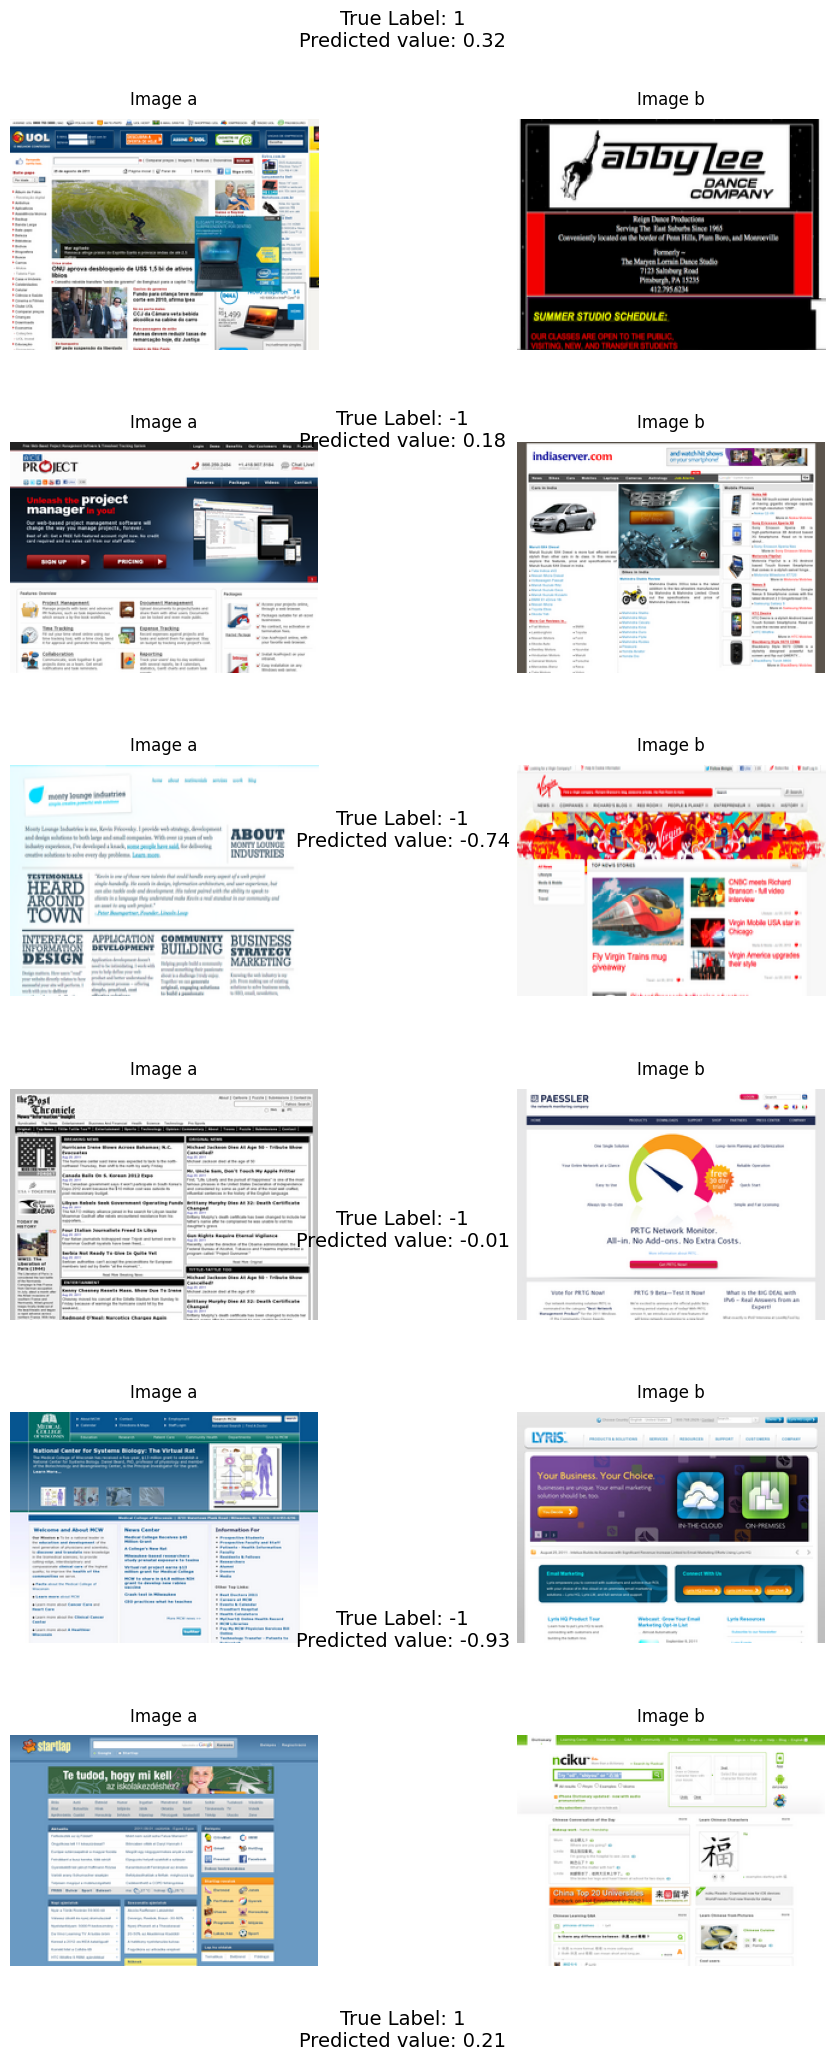

Custom Binary Accuracy: 0.6891891956329346


In [32]:

# # pair_ids = [87, 45, 49, 94, 14, 83] # test image IDs sorted in descending order according to the website's aesthetics level

# # Pick random pairs
# num_pairs_to_display = 6  # Number of pairs to display
# pair_ids = random.sample(range(len(X_pairs_val)), num_pairs_to_display)




# # Comparison Model

# Normalize image pairs
def normalize_image_pairs(X_pairs):
    normalized_pairs = []
    for img1, img2 in X_pairs:
        img1_normalized = img1 / 255.0
        img2_normalized = img2 / 255.0
        normalized_pairs.append((img1_normalized, img2_normalized))
    return normalized_pairs

# Normalize the validation image pairs
X_pairs_val_normalized = normalize_image_pairs(X_pairs_val)

# Predict
comparison_predictions = []

for img1, img2 in X_pairs_val_normalized:
    # Add batch dimension
    img1_normalized = np.expand_dims(img1, axis=0)
    img2_normalized = np.expand_dims(img2, axis=0)
    
    # Predict
    pred = comparison_model.predict([img1_normalized, img2_normalized])
    comparison_predictions.append(float(pred))

comparison_predictions = np.array(comparison_predictions)

# # Pick random pairs
# num_pairs_to_display = 6  # Number of pairs to display
# pair_ids = random.sample(range(len(X_pairs_val)), num_pairs_to_display)

# Manually select specific IDs
manual_pair_ids = [87, 45, 49, 94, 14, 83]  # Replace with desired IDs

# Plotting
fig, axes = plt.subplots(len(manual_pair_ids), 2, figsize=(12, len(manual_pair_ids) * 4))
fig.subplots_adjust(hspace=0.4)
i = 0
for idx, id in enumerate(manual_pair_ids):
    img1, img2 = X_pairs_val[id]
    
    # Plot first image of the pair
    axes[idx, 0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    axes[idx, 0].axis('off')
    axes[idx, 0].set_title('Image a', fontsize=12, pad=10)
    
    # Plot second image of the pair
    axes[idx, 1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    axes[idx, 1].axis('off')
    axes[idx, 1].set_title('Image b', fontsize=12, pad=10)
    
    # # Add text with the true label and predicted value in the middle between the images
    # axes[idx, 0].text(0.5, -0.2, f'True Label: {y_pairs_val[id]}\nPredicted value: {comparison_predictions[id]:.2f}',
    #                   fontsize=14, ha='center', va='center', transform=axes[idx, 0].transAxes)
    # Add text with the true label and predicted value in the middle between the images
    fig.text(0.5, (len(manual_pair_ids) - idx - 0.5) / len(manual_pair_ids), 
             f'True Label: {y_pairs_val[id]}\nPredicted value: {comparison_predictions[id]:.2f}', 
             ha='center', va='center', fontsize=14)

plt.show()

# Convert predictions to binary labels using 0.0 as threshold
binary_predictions = np.where(comparison_predictions >= 0.0, 1.0, -1.0)

# Calculate custom binary accuracy
accuracy = custom_binary_accuracy(y_pairs_val, binary_predictions)

print(f"Custom Binary Accuracy: {accuracy.numpy()}")